In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PLUME_function import *
import seaborn as sns
%matplotlib inline

## Data importing

In [2]:
Xtrain,Ytrain,Xtest,VarNames = DataImporting()

In [42]:
X_NO2 = DataSample(Xtrain,"NO2")
X_O3 = DataSample(Xtrain,"O3")
#X = pd.DataFrame({X_NO2,X_O3})
X = pd.concat([X_NO2, X_O3], axis=1)
Y = DataSample(Ytrain,"NO2").values
print np.shape(Y)

(4031, 24)


In [162]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=1)
clf.fit(Y, X)



Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

(array([   6.,   33.,   48.,  176.,  137.,   82.,   16.,    8.,   11.,    8.]),
 array([-0.71995097, -0.53391909, -0.34788722, -0.16185535,  0.02417653,
         0.2102084 ,  0.39624028,  0.58227215,  0.76830402,  0.9543359 ,
         1.14036777]),
 <a list of 10 Patch objects>)

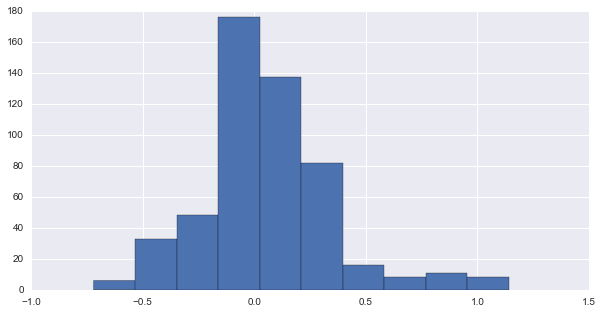

In [163]:
plt.figure(figsize = [10,5])
hour = 1
plt.hist([clf.coef_[i][hour-1] for i in range(np.shape(clf.coef_)[0])], bins = 10)
#print(clf.intercept_)
#[int(clf.coef_[i][1]!=0) for i in range(np.shape(clf.coef_)[0])]



In [164]:
Xtrain.iloc[[int(clf.coef_[i][1]!=0) for i in range(np.shape(clf.coef_)[0])]].head()

,date,hour,day,month,isPublicHollyday,isPublicHollyday_-24,isPublicHollyday_+24,isSundayOrPublicHollyday,isSundayOrPublicHollyday_-24,isSundayOrPublicHollyday_+24,...,PM10_04034_-9,PM10_04034_-8,PM10_04034_-7,PM10_04034_-6,PM10_04034_-5,PM10_04034_-4,PM10_04034_-3,PM10_04034_-2,PM10_04034_-1,PM10_04034_0
0,2015-01-28 03,3,2,1,0,0,0,0,0,0,...,23,29,31,28,26.00,24.25,19.428581,19.412934,19,20
1,2015-01-28 04,4,2,1,0,0,0,0,0,0,...,29,31,28,26,24.25,22.50,19.428581,19.000000,20,20
1,2015-01-28 04,4,2,1,0,0,0,0,0,0,...,29,31,28,26,24.25,22.50,19.428581,19.000000,20,20
1,2015-01-28 04,4,2,1,0,0,0,0,0,0,...,29,31,28,26,24.25,22.50,19.428581,19.000000,20,20
0,2015-01-28 03,3,2,1,0,0,0,0,0,0,...,23,29,31,28,26.00,24.25,19.428581,19.412934,19,20


In [169]:
hour = 3
a=pd.Series([int(clf.coef_[i][1]!=0) for i in range(np.shape(clf.coef_)[0])])
X_lasso = X.loc[:,a.values != 0]
Y_hour = Y[:,hour-1]

In [170]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_lasso,Y_hour)
MSE = np.mean((Y_hour - lm.predict(X_lasso)) ** 2)
R2 = lm.score(X_lasso,Y_hour)
print 'MSE = ' + str(MSE) + '\n'
print 'R2 = ' + str(R2) + '\n'

MSE = 112.448930025

R2 = 0.700200585088



In [171]:
lm = linear_model.LinearRegression()
lm.fit(X,Y_hour)
MSE = np.mean((Y_hour - lm.predict(X)) ** 2)
R2 = lm.score(X,Y_hour)
print 'MSE = ' + str(MSE) + '\n'
print 'R2 = ' + str(R2) + '\n'

MSE = 104.953289517

R2 = 0.72018466709



In [168]:
print np.shape(X_lasso)

(4031, 292)
